<a href="https://colab.research.google.com/github/jithesh9539/Customer_Segmentation_Final/blob/main/Customer_Segmentation_CMPE255.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.preprocessing import LabelEncoder, StandardScaler, Normalizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import preprocessing, model_selection, metrics, feature_selection
from sklearn.model_selection import GridSearchCV, learning_curve
import datetime as dt

In [ ]:
customer_data=pd.read_csv('/content/data.csv',encoding= 'unicode_escape')

In [ ]:
customer_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


**Checking the information of imported dataset**

In [ ]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


**Checking the statistical analysis of Dataset**

In [ ]:
customer_data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


**Checking if there any missing values in the dataset**

In [ ]:
customer_data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

**Can observe from the above cell output that there are many missing values in CustomerID column, it is not a good approach to impute the values as it will affect the accuracy of the model**

In [ ]:
customer_data.shape

(541909, 8)

In [ ]:
customer_data.dropna(axis=0,subset=['CustomerID'],inplace=True)

In [ ]:
customer_data.shape

(406829, 8)

In [ ]:
customer_data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

**Checking for duplicate records in the dataset**

In [ ]:
customer_data.duplicated().sum()

5225

**Dropping the duplicate records from Dataset**

In [ ]:
customer_data.drop_duplicates(inplace=True)

In [ ]:
customer_data.shape

(401604, 8)

In [ ]:
print ("Total number of customers distributed in every country present in the dataset \n",customer_data.Country.value_counts())

Total number of customers distributed in every country present in the dataset 
 United Kingdom          356728
Germany                   9480
France                    8475
EIRE                      7475
Spain                     2528
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1471
Australia                 1258
Norway                    1086
Italy                      803
Channel Islands            757
Finland                    695
Cyprus                     611
Sweden                     461
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     247
Unspecified                241
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community   

**The dataset contains more number of customers in UK region and we shall proceed in finding the buying behaviour and categorize them accordingly**

In [ ]:
customer_data_uk=customer_data[customer_data.Country=='United Kingdom']

In [ ]:
customer_data_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
customer_data_uk.describe()

,Quantity,UnitPrice,CustomerID
count,356728.000000,356728.000000,356728.000000
mean,11.198644,3.268255,15543.795284
std,264.998044,71.162330,1594.286219
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,14191.000000
50%,4.000000,1.950000,15513.000000
75%,12.000000,3.750000,16931.000000
max,80995.000000,38970.000000,18287.000000


**From above description can observe that the quanity column is having negative values, it needs to be filtered out to proceed with further analysis of data**

In [ ]:
customer_data_uk=customer_data_uk[(customer_data_uk['Quantity']>0)]

**Converting the Date column that is in String Format to DateTime to perform RFM**

In [ ]:
customer_data_uk['InvoiceDate']=pd.to_datetime(customer_data_uk['InvoiceDate'])

In [ ]:
customer_data_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


**Adding new column in Dataset named Total Price which is the product of the number of quantity and unit price for that specific item**

In [ ]:
customer_data_uk['TotalPrice']=customer_data_uk['Quantity'] * customer_data_uk['UnitPrice']

In [ ]:
customer_data_uk.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
customer_data_uk.shape

(349227, 9)

**RFM Analysis**

In [ ]:
customer_data_uk.InvoiceDate.max()

Timestamp('2011-12-09 12:49:00')

In [ ]:
customer_data_uk.InvoiceDate.min()

Timestamp('2010-12-01 08:26:00')

**To calculate Recency, we calculate the number of days between present date (i.e. Today) and date of last purchase of each customer. We first define today's date and then get the .max() function of InvoiceDate to calculate the number of days between today and date of last purchase.**

In [ ]:
# assume we are doing this analysis on the next day after this data is generated


import datetime as dt # for calculating recency 

present_date = dt.datetime(2011, 12, 10) # as maximum date in dataset is 2011/12/09 so we will set our current date as 2011/12/10

# Now we will create RFM modeling score for each customer

rfm_data = customer_data_uk.groupby('CustomerID').agg({
                        'InvoiceDate' : lambda x : (present_date - x.max()).days, 
                        'InvoiceNo' : lambda x : x.count(), 
                        'TotalPrice' : lambda x : sum(x) })

# Now we will rename columns name to Recency, Frequency and Monetory
rfm_data.rename(columns = {
                        'InvoiceDate' : 'Recency', 
                        'InvoiceNo' : 'Frequency', 
                        'TotalPrice' : 'Monetary' }, inplace = True)

# Now we will use resetindex to make sure that indexes are continuos.
rfm_data.reset_index(inplace = True)

In [ ]:
rfm_data.head(10)

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12747.0,2,103,4196.01
2,12748.0,0,4413,33053.19
3,12749.0,3,199,4090.88
4,12820.0,3,59,942.34
5,12821.0,214,6,92.72
6,12822.0,70,46,948.88
7,12823.0,74,5,1759.50
8,12824.0,59,25,397.12
9,12826.0,2,91,1474.72


**Frequency**

In [ ]:
rfm_data.describe()

,CustomerID,Recency,Frequency,Monetary
count,3921.000000,3921.000000,3921.000000,3921.000000
mean,15561.471563,91.722265,89.065800,1857.950687
std,1576.823683,99.528532,214.022733,7477.736186
min,12346.000000,0.000000,1.000000,0.000000
25%,14208.000000,17.000000,17.000000,298.110000
50%,15569.000000,50.000000,40.000000,644.300000
75%,16913.000000,142.000000,98.000000,1570.810000
max,18287.000000,373.000000,7676.000000,259657.300000


**Distribution Plot for RFM Dataset**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:177: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  kws["color"] = to_rgba(color, alpha)


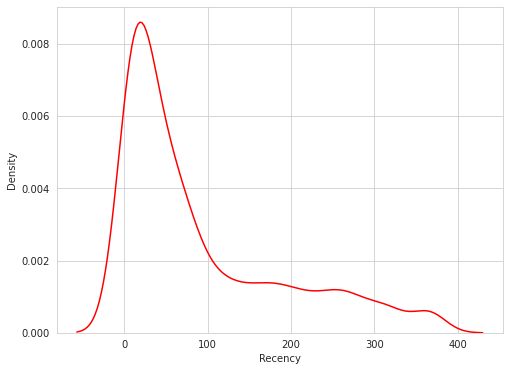

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize = (8, 6))

# Distribution Plot for Recency
sns.distplot(rfm_data.Recency, hist = False, color = 'R')

# Can observe in below graph that receny is right skewed in rfm_dataset

**Monetary**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


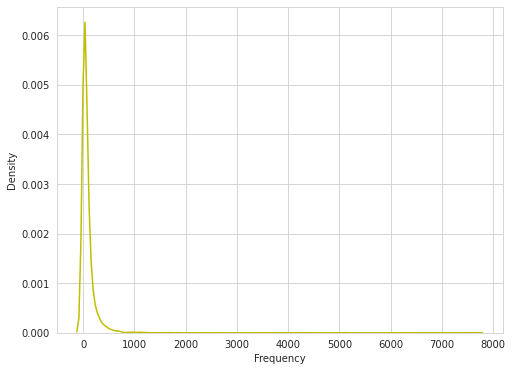

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize = (8, 6))

# Distribution Plot for Frequency 
sns.distplot(rfm_data.Frequency, hist = False, color = 'y')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


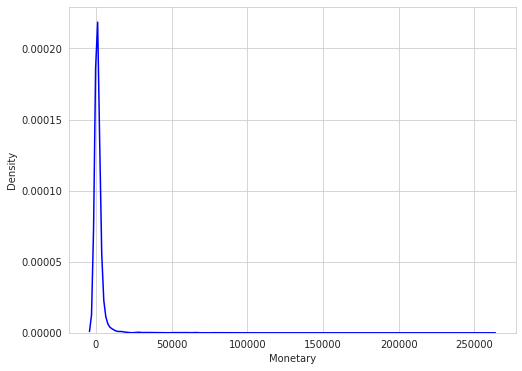

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize = (8, 6))

# plotting only Monetory

sns.distplot(rfm_data.Monetary, hist = False, color = 'b')



**Diving customers into four different segments based on RFM Scores using Quantile Function**

In [ ]:
quantiles = rfm_data.quantile(q = [0.25, 0.5, 0.75 ])
quantiles = quantiles.to_dict() # coverting into dictionary for easier mapping 
quantiles

{'CustomerID': {0.25: 14208.0, 0.5: 15569.0, 0.75: 16913.0},
 'Frequency': {0.25: 17.0, 0.5: 40.0, 0.75: 98.0},
 'Monetary': {0.25: 298.10999999999996, 0.5: 644.3, 0.75: 1570.8099999999993},
 'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 142.0}}

In [ ]:
# Now we will assign  R and FM score to each category and customers
def R_score(val, param):
    if val <= quantiles[param][0.25]:   return 1
    elif val <= quantiles[param][0.50]: return 2
    elif val <= quantiles[param][0.75]: return 3
    else: return 4

def FM_score(val, param):
    if val <= quantiles[param][0.25]:   return 4
    elif val <= quantiles[param][0.50]: return 3
    elif val <= quantiles[param][0.75]: return 2
    else: return 1

In [ ]:
rfm_data['R'] = rfm_data['Recency'].apply(lambda x : R_score(x, 'Recency')) # giving R score 
rfm_data['F'] = rfm_data['Frequency'].apply(lambda x : FM_score(x, 'Frequency')) # giving F score
rfm_data['M'] = rfm_data['Monetary'].apply(lambda x : FM_score(x, 'Monetary')) # giving M score

In [ ]:
rfm_data.head(10)

,CustomerID,Recency,Frequency,Monetary,R,F,M
0,12346.0,325,1,77183.60,4,4,1
1,12747.0,2,103,4196.01,1,1,1
2,12748.0,0,4413,33053.19,1,1,1
3,12749.0,3,199,4090.88,1,1,1
4,12820.0,3,59,942.34,1,2,2
5,12821.0,214,6,92.72,4,4,4
6,12822.0,70,46,948.88,3,2,2
7,12823.0,74,5,1759.50,3,4,1
8,12824.0,59,25,397.12,3,3,3
9,12826.0,2,91,1474.72,1,2,2


In [ ]:
# Now we will add 2 another columns for rfm_data which incude rfm_score and rfm_group which will further  show that to which
# group it will belong. 

rfm_data['Group'] = rfm_data.R.map(str) + rfm_data.F.map(str) + rfm_data.M.map(str) 

# here we will make a new column of score which will store the score of group by adding RFM scores
rfm_data['Score'] = rfm_data[['R', 'F', 'M']].sum(axis = 1)

rfm_data.head(10)

,CustomerID,Recency,Frequency,Monetary,R,F,M,Group,Score
0,12346.0,325,1,77183.60,4,4,1,441,9
1,12747.0,2,103,4196.01,1,1,1,111,3
2,12748.0,0,4413,33053.19,1,1,1,111,3
3,12749.0,3,199,4090.88,1,1,1,111,3
4,12820.0,3,59,942.34,1,2,2,122,5
5,12821.0,214,6,92.72,4,4,4,444,12
6,12822.0,70,46,948.88,3,2,2,322,7
7,12823.0,74,5,1759.50,3,4,1,341,8
8,12824.0,59,25,397.12,3,3,3,333,9
9,12826.0,2,91,1474.72,1,2,2,122,5


In [ ]:
# Now we will assign the groups to the customers on basis of their RFM Score which we calcluated earlier 
# in our case we will make 4 groups i.e Platinum, gold, silver and Bronze which are Membership level to the company

Membership_Level = ['Platinum', 'Gold', 'Silver', 'Bronze']  # assigning membership level for customers

Score_cuts = pd.qcut(rfm_data.Score, q = 4, labels = Membership_Level)

rfm_data['Membership'] = Score_cuts.values # assign the score cuts values to new column Membership

rfm_data.head(10)

,CustomerID,Recency,Frequency,Monetary,R,F,M,Group,Score,Membership
0,12346.0,325,1,77183.60,4,4,1,441,9,Silver
1,12747.0,2,103,4196.01,1,1,1,111,3,Platinum
2,12748.0,0,4413,33053.19,1,1,1,111,3,Platinum
3,12749.0,3,199,4090.88,1,1,1,111,3,Platinum
4,12820.0,3,59,942.34,1,2,2,122,5,Platinum
5,12821.0,214,6,92.72,4,4,4,444,12,Bronze
6,12822.0,70,46,948.88,3,2,2,322,7,Gold
7,12823.0,74,5,1759.50,3,4,1,341,8,Gold
8,12824.0,59,25,397.12,3,3,3,333,9,Silver
9,12826.0,2,91,1474.72,1,2,2,122,5,Platinum


**To validate if customers are grouped to Platinum category based on RFM Group '111'**

In [ ]:
rfm_data[rfm_data['Group']=='111'].sort_values('Monetary',ascending=False).reset_index().head()

,index,CustomerID,Recency,Frequency,Monetary,R,F,M,Group,Score,Membership
0,3784,18102.0,0,431,259657.30,1,1,1,111,3,Platinum
1,3315,17450.0,8,336,194390.79,1,1,1,111,3,Platinum
2,3357,17511.0,2,963,91062.38,1,1,1,111,3,Platinum
3,2767,16684.0,4,277,66653.56,1,1,1,111,3,Platinum
4,903,14096.0,4,5111,65164.79,1,1,1,111,3,Platinum


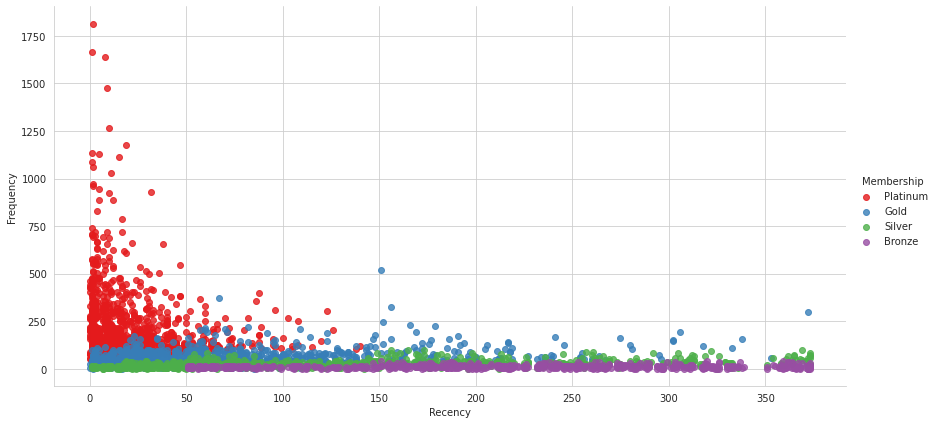

In [ ]:
dist = rfm_data[rfm_data.Frequency < 2000] # as most of the frequency value is less than 2000 

sns.lmplot(x = 'Recency', y = 'Frequency', hue = 'Membership', data = dist, palette = 'Set1', fit_reg = False, height = 6, aspect = 2) 

As data is right skewed from the distribution plot of Recency,Frequency and Monetary and we need to perform suitable normalization technique to scale our data using log transformation

In [ ]:
import math

# training dataset which only contain 3 features of RFM for finding optimal value of K in Kmeans
X_train = rfm_data.iloc[:, [1, 2, 3]]

# now we will apply changes to the X_training dataset instead of the original RFM dataset
X_train.Recency = rfm_data.Recency.apply(lambda x : 0 if x == 0 else round(math.log(x), 3)) 
X_train.Frequency = rfm_data.Frequency.apply(lambda x : 0 if x == 0 else round(math.log(x), 3))
X_train.Monetary = rfm_data.Monetary.apply(lambda x : 0 if x == 0 else round(math.log(x), 3))

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


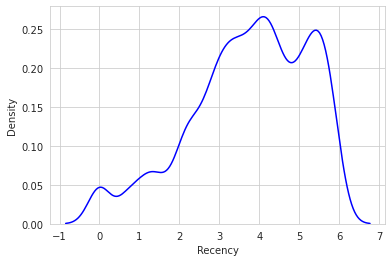

In [ ]:
sns.distplot(X_train['Recency'], hist = False, color = 'b')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


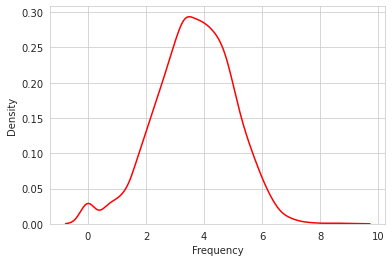

In [ ]:
sns.distplot(X_train['Frequency'], hist = False, color = 'r')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


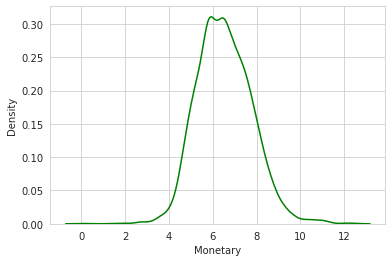

In [ ]:
sns.distplot(X_train['Monetary'], hist = False, color = 'g')

In [ ]:
# we will apply standard scaler to bring the dimension of X_train in same range
from sklearn.preprocessing import StandardScaler as scaler
# we will apply standard scaler to bring the dimension of X_train in same range

sc = scaler() # create instance of Standardscaler

Scaled_Data = sc.fit_transform(X_train) # applying transformation to X_train

Scaled_Data = pd.DataFrame(Scaled_Data, index = rfm_data.index, columns = X_train.columns) # changing into dataframe again # changing into dataframe again

In [ ]:
Scaled_Data.head()

,Recency,Frequency,Monetary
0,1.389971,-2.738851,3.768593
1,-2.061189,0.736870,1.442565
2,-2.530970,3.554192,3.091233
3,-1.785964,1.230295,1.422596
4,-1.785964,0.319184,0.249198


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


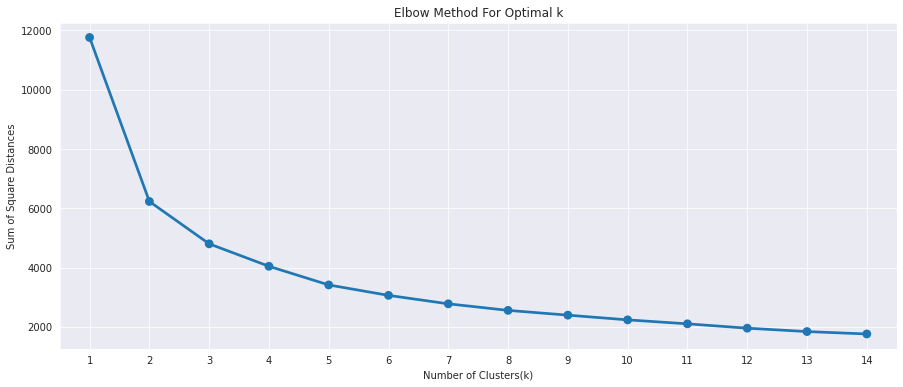

In [ ]:
# Now we will find the optimal value of k in Kmeans clustering using elbow method

from sklearn.cluster import KMeans

square_dist = [] # for storing square_distance after using Kmeans model
itr = [] # for storing iteration count 

for i in range(1, 15) : 
    model = KMeans(n_clusters = i,init='k-means++', max_iter = 1000)
    model.fit(Scaled_Data)
    square_dist.append(model.inertia_)
    itr.append(i)

# now we will plot the graphical representaion of square distance and iterations
sns.set_style('darkgrid')
plt.figure(figsize = (15, 6))
sns.pointplot(itr, square_dist, col = 'b')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

# After plotting we infer that there is sharp decrease / elbow formed when n_clusters are = 4 so we will
# create our final model using number of clusters equals to 4

In [ ]:
# Now we will build the model using K Means clustering. 
model = KMeans(n_clusters = 4, max_iter = 1000)

# fitting scaled dataset into our Kmeans Model
model.fit(Scaled_Data)

# adding cluster variable to the RFM dataset to check membership level of customer. 
rfm_data['Cluster'] = model.labels_ # labels_ returns the cluster of each datapoint.


In [57]:
rfm_data.head(5)

,CustomerID,Recency,Frequency,Monetary,R,F,M,Group,Score,Membership,Cluster
0,12346.0,325,1,77183.60,4,4,1,441,9,Silver,1
1,12747.0,2,103,4196.01,1,1,1,111,3,Platinum,3
2,12748.0,0,4413,33053.19,1,1,1,111,3,Platinum,3
3,12749.0,3,199,4090.88,1,1,1,111,3,Platinum,3
4,12820.0,3,59,942.34,1,2,2,122,5,Platinum,3


In [59]:
counts = rfm_data.groupby('Membership').size().reset_index(name='counts')
counts

,Membership,counts
0,Platinum,1142
1,Gold,1177
2,Silver,898
3,Bronze,704


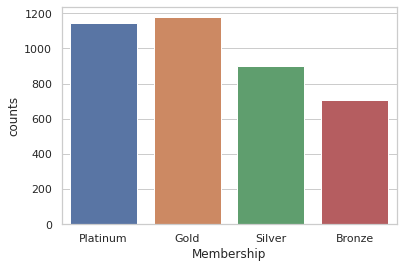

In [60]:
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
ax = sns.barplot(x=counts['Membership'], y=counts['counts'])

In [ ]:
# tdata[] = [2.344127, -0.411531,	10.074607]

tdata = {'recency': [4.344127, -0.921685],
	'frequency': [-0.111531, 20.205731],
	'monetary': [20.074607, 4.172281]}
dd = pd.DataFrame(tdata)
dd.head()

,recency,frequency,monetary
0,4.344127,-0.111531,20.074607
1,-0.921685,20.205731,4.172281


In [ ]:
a = model.predict(dd.head())
print(a[0], a[1])

3 3


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- frequency
- monetary
- recency
Feature names seen at fit time, yet now missing:
- Frequency
- Monetary
- Recency

  warnings.warn(message, FutureWarning)


In [ ]:
import pickle
pickle.dump(model, open('kmeans_model.pkl','wb'))

In [ ]:
Scaled_Data.head()

,Recency,Frequency,Monetary
0,1.389971,-2.738851,3.768593
1,-2.061189,0.736870,1.442565
2,-2.530970,3.554192,3.091233
3,-1.785964,1.230295,1.422596
4,-1.785964,0.319184,0.249198


In [ ]:
result_df = rfm_data.groupby('Cluster')[['Recency', 'Frequency', 'Monetary','CustomerID']].agg({'Recency': 'mean', 'Frequency': 'mean', 'Monetary':'mean','CustomerID':'nunique'}).reset_index()
result_df = result_df.rename(columns = {'CustomerID':'Number of Buyers'})
result_df

,Cluster,Recency,Frequency,Monetary,Number of Buyers
0,0,191.923778,14.889809,290.090399,1207
1,1,83.349798,87.493117,1552.882294,1235
2,2,24.148244,31.947984,490.489688,769
3,3,9.132394,279.764789,6535.055394,710


In [ ]:
rfm_data.head(20)

,CustomerID,Recency,Frequency,Monetary,R,F,M,Group,Score,Membership,Cluster
0,12346.0,325,1,77183.60,4,4,1,441,9,Silver,1
1,12747.0,2,103,4196.01,1,1,1,111,3,Platinum,3
2,12748.0,0,4413,33053.19,1,1,1,111,3,Platinum,3
3,12749.0,3,199,4090.88,1,1,1,111,3,Platinum,3
4,12820.0,3,59,942.34,1,2,2,122,5,Platinum,3
5,12821.0,214,6,92.72,4,4,4,444,12,Bronze,0
6,12822.0,70,46,948.88,3,2,2,322,7,Gold,1
7,12823.0,74,5,1759.50,3,4,1,341,8,Gold,0
8,12824.0,59,25,397.12,3,3,3,333,9,Silver,2
9,12826.0,2,91,1474.72,1,2,2,122,5,Platinum,3


In [ ]:
Scaled_Data.head()

,Recency,Frequency,Monetary
0,1.389971,-2.738851,3.768593
1,-2.061189,0.736870,1.442565
2,-2.530970,3.554192,3.091233
3,-1.785964,1.230295,1.422596
4,-1.785964,0.319184,0.249198
